In [1]:
import numpy as np
import scipy 
import seaborn as sns
import pandas as pd
import json
import math
import pingouin
import math

In [2]:
with open('../Results/resultsPython.json') as json_file:
    dataPython = json.load(json_file)
with open('../Results/resultsJava.json') as json_file:
    dataJava = json.load(json_file)
with open('../Results/resultsC.json') as json_file:
    dataC = json.load(json_file)

In [3]:
def calculate_hedges(model, language):
 distribution_model=[]
 distribution_human=[]
 if language=="Python":
  for task in dataPython.keys():
   if np.mean(dataPython[task][model]["Energy Linux"])>15:
    distribution_model.append(dataPython[task][model]["Energy Linux"])
    distribution_human.append(dataPython[task]["human"]["Energy Linux"])
 elif language=="Java":
  for task in dataJava.keys():
   if np.mean(dataJava[task][model]["Energy Linux"])>15:
    distribution_model.append(dataJava[task][model]["Energy Linux"])
    distribution_human.append(dataJava[task]["human"]["Energy Linux"])
 elif language=="C":
  for task in dataC.keys():
   if np.mean(dataC[task][model]["Energy Linux"])>15:
    distribution_model.append(dataC[task][model]["Energy Linux"])
    distribution_human.append(dataC[task]["human"]["Energy Linux"])
 return pingouin.compute_effsize(distribution_human, distribution_model, eftype='hedges')

In [4]:
abs(calculate_hedges("copilot", "Java").item())

0.011508136190032804

In [5]:
sample_size={"o1-mini":[abs(calculate_hedges("o1", "Python")), abs(calculate_hedges("o1", "Java")), abs(calculate_hedges("o1", "C"))],"4o":[calculate_hedges("4o", "Python"), abs(calculate_hedges("4o", "Java")), abs(calculate_hedges("4o", "C"))], "copilot":[abs(calculate_hedges("copilot", "Python")), abs(calculate_hedges("copilot", "Java")), abs(calculate_hedges("copilot", "C"))]}
df=pd.DataFrame(sample_size)
df

,o1-mini,4o,copilot
0,0.108106,0.189319,0.189204
1,0.095566,0.140344,0.011508
2,0.475386,0.432789,0.681102


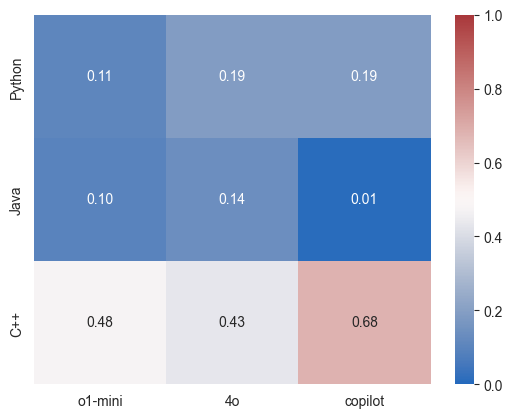

In [7]:
svm=sns.heatmap(data=df, annot=True, fmt=".2f", cmap="vlag", vmax=1, vmin=-0, yticklabels=["Python","Java", "C++"])
figure = svm.get_figure()    
figure.savefig('./Heatmaps/effect_size.png', dpi=400)